In [73]:
import tensorflow as tf
from matplotlib import pyplot as plt


# License problem
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs2' )

In [22]:
batch_size = 64
image_size = (224, 224)

In [23]:
dataset_train = tf.keras.utils.image_dataset_from_directory(
    directory ='/Users/tina/Desktop/ML/Datasets/AnimalDataset/raw-img',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    seed=42,
    subset='training'
)

dataset_val = tf.keras.utils.image_dataset_from_directory(
    directory='/Users/tina/Desktop/ML/Datasets/AnimalDataset/raw-img',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    seed=42,
    subset='validation'
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


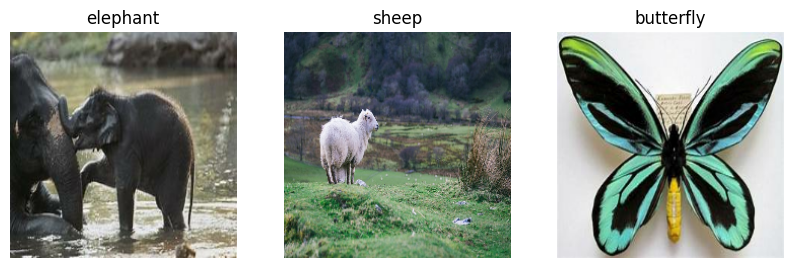

In [24]:
class_names = dataset_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomBrightness(factor=0.2)
])

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size=AUTOTUNE)
dataset_val = dataset_val.prefetch(buffer_size=AUTOTUNE)

In [27]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [32]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=image_size + (3,),
    pooling=None,
    classifier_activation='softmax',
)

16705208/16705208 [==============================] - 31s 2us/step


In [33]:
image_batch, label_batch = next(iter(dataset_train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(64, 7, 7, 1280)


In [34]:
base_model.trainable = False

In [35]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3

In [36]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [37]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(10)(x)
model = tf.keras.Model(inputs, output)

In [39]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(dataset_train,
                    epochs=10,
                    verbose=2,
                    validation_data=dataset_val,
                    callbacks = [tensorboard])

Epoch 1/10


2023-06-16 14:49:06.746069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-16 14:49:07.704598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:49:13.203931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:49:14.168496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:49:15.137078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:49:17.089407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16

328/328 - 424s - loss: 1.0297 - accuracy: 0.6752 - val_loss: 0.2415 - val_accuracy: 0.9557 - 424s/epoch - 1s/step
Epoch 2/10


2023-06-16 14:56:07.087667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:56:09.681790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:56:10.606719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:56:11.503691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:56:12.426708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 14:56:13.354903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 395s - loss: 0.4275 - accuracy: 0.8701 - val_loss: 0.1498 - val_accuracy: 0.9660 - 395s/epoch - 1s/step
Epoch 3/10


2023-06-16 15:02:41.823488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:02:43.661609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:02:44.721259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:02:45.730851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:02:46.727225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:02:47.692256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 279s - loss: 0.3409 - accuracy: 0.8953 - val_loss: 0.1234 - val_accuracy: 0.9696 - 279s/epoch - 849ms/step
Epoch 4/10


2023-06-16 15:07:20.436324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:07:21.509741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:07:22.140454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:07:22.798500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:07:23.383444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:07:23.992889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 223s - loss: 0.3062 - accuracy: 0.9033 - val_loss: 0.1122 - val_accuracy: 0.9715 - 223s/epoch - 681ms/step
Epoch 5/10


2023-06-16 15:11:03.931392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:11:04.840104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:11:05.416016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:11:05.987711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:11:06.574275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:11:07.131301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 232s - loss: 0.2790 - accuracy: 0.9113 - val_loss: 0.1055 - val_accuracy: 0.9723 - 232s/epoch - 706ms/step
Epoch 6/10


2023-06-16 15:14:55.664635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:14:56.654930: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:14:57.263215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:14:57.864992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:14:58.492851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:14:59.081817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 245s - loss: 0.2668 - accuracy: 0.9162 - val_loss: 0.1009 - val_accuracy: 0.9734 - 245s/epoch - 747ms/step
Epoch 7/10


2023-06-16 15:19:00.779552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:19:01.756287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:19:02.345563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:19:02.945148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:19:03.532927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:19:04.102900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 273s - loss: 0.2595 - accuracy: 0.9186 - val_loss: 0.0974 - val_accuracy: 0.9734 - 273s/epoch - 832ms/step
Epoch 8/10


2023-06-16 15:23:33.627821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:23:34.751701: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:23:35.411878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:23:36.059661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:23:36.684635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:23:37.338309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 288s - loss: 0.2404 - accuracy: 0.9262 - val_loss: 0.0943 - val_accuracy: 0.9746 - 288s/epoch - 878ms/step
Epoch 9/10


2023-06-16 15:28:21.708324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:28:23.872543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:28:24.520705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:28:25.195243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:28:25.856972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:28:26.513295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 296s - loss: 0.2402 - accuracy: 0.9254 - val_loss: 0.0931 - val_accuracy: 0.9744 - 296s/epoch - 903ms/step
Epoch 10/10


2023-06-16 15:33:18.015484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:33:20.089305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:33:20.724040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:33:21.347804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:33:22.014320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-06-16 15:33:22.664669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

328/328 - 339s - loss: 0.2315 - accuracy: 0.9258 - val_loss: 0.0911 - val_accuracy: 0.9746 - 339s/epoch - 1s/step


In [41]:
model.evaluate(dataset_val)

16/82 [====>.........................] - ETA: 32s - loss: 0.0893 - accuracy: 0.9795

2023-06-16 15:40:20.061408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/82 [=====>........................] - ETA: 31s - loss: 0.0955 - accuracy: 0.9778

2023-06-16 15:40:21.644441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/82 [======>.......................] - ETA: 30s - loss: 0.0964 - accuracy: 0.9769

2023-06-16 15:40:22.671931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/82 [===============>..............] - ETA: 19s - loss: 0.0878 - accuracy: 0.9757

2023-06-16 15:40:36.035070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/82 [=======================>......] - ETA: 8s - loss: 0.0841 - accuracy: 0.9759

2023-06-16 15:40:47.662355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/82 [==============================] - 45s 540ms/step - loss: 0.0911 - accuracy: 0.9746


[0.09112778306007385, 0.9745941162109375]

In [70]:
# Test Dataset collected from other resources

dataset_test = tf.keras.utils.image_dataset_from_directory(
    directory ='/Users/tina/Desktop/ML/Datasets/AnimalTest',
    color_mode='rgb',
    image_size=image_size,
)

Found 339 files belonging to 10 classes.


In [71]:
dataset_test = dataset_test.prefetch(buffer_size=AUTOTUNE)

In [72]:
model.evaluate(dataset_test)

11/11 [==============================] - 9s 533ms/step - loss: 0.0999 - accuracy: 0.9735


[0.09986990690231323, 0.9734513163566589]